<a href="https://colab.research.google.com/github/kristynatasha/Indonesian-Monsoon-Index/blob/main/fullscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data NetCDF

### **ERA-5**

In [ ]:
ls 'drive/MyDrive/TA/ERA-5/'

adaptor.mars.internal-1678161008.4287508-3744-8-ae01e955-b325-454b-b526-a38983daab9c.nc
adaptor.mars.internal-1678161863.2949512-16760-2-de3f95de-b4ee-4d31-88af-852368d8ea26.nc
adaptor.mars.internal-200hPa-1959-2022.nc
adaptor.mars.internal-200hPa-2023.nc
adaptor.mars.internal-850hPa-1959-2022.nc
adaptor.mars.internal-850hPa-2023.nc


In [ ]:
!pip install NetCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.8 MB/s eta 0:00:00


In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import scipy.stats as st
import xarray as xr
#from NetCDF4 import Dataset
import NetCDF4 as nc
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
# Load the NetCDF data into an xarray dataset
data = xr.open_dataset('drive/MyDrive/TA/ERA-5/adaptor.mars.internal-850hPa-2023.nc')
data

In [ ]:
# Extract the wind data at 200hPa and 850hPa
#wind_200hPa = data.u
#.sel(expver=1)
wind_850hPa = data.u
#.sel(expver=1)
#+ 1j * data.v.sel(expver=1)
#wind_200hPa = data.u.sel(level=200) + 1j * data.v.sel(level=200)

# Compute the result (i.e., load the data into memory)
wind_850hPa = wind_850hPa.compute()
#wind_200hPa = wind_200hPa.compute()

# Assign a name to your DataArray
#wind_850hPa.name = 'wind'

wind_850hPa
#wind_200hPa

In [ ]:
import pandas as pd

# Assign a name to your DataArray
wind_850hPa.name = 'wind'

# Convert DataArray to DataFrame
df = wind_850hPa.to_dataframe()

# Save DataFrame as Excel file
df.to_excel("drive/MyDrive/TA/U850hPa-2023.xlsx")

In [ ]:
import pandas as pd

# Create a new Excel file with one sheet
with pd.ExcelWriter('drive/MyDrive/TA/U200hPa-2023.xlsx') as writer:
    wind_200hPa.isel(time=0).to_dataframe().to_excel(writer, sheet_name='Sheet1', index=False)

    # Loop over the remaining time steps and append to the same sheet
    start_row = 1
    for i in range(1, len(wind_200hPa.time)):
        num_rows = wind_200hPa.isel(time=i).shape[0]
        end_row = start_row + num_rows - 1
        wind_200hPa.isel(time=i).to_dataframe().to_excel(writer, sheet_name='Sheet1', startrow=start_row, index=False, header=False)
        start_row = end_row + 1

IndexError: ignored

In [ ]:
import pandas as pd

# Create a new Excel file with one sheet
with pd.ExcelWriter('drive/MyDrive/TA/U850hPa-1959-2022.xlsx') as writer:
    wind_850hPa.isel(time=0).to_dataframe().to_excel(writer, sheet_name='Sheet1', index=False)

    # Loop over the remaining time steps and append to the same sheet
    start_row = 1
    for i in range(1, len(wind_850hPa.time)):
        num_rows = wind_850hPa.isel(time=i).shape[0]
        end_row = start_row + num_rows - 1
        wind_850hPa.isel(time=i).to_dataframe().to_excel(writer, sheet_name='Sheet1', startrow=start_row, index=False, header=False)
        start_row = end_row + 1

### **MSWEP**

In [ ]:
!pip install xarray

In [ ]:
# Load the .nc file using xarray
import xarray as xr
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']
ds

# Visualisasi Data Awal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindofix.xlsx')
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,index
0,1959-01-01,0.000000
1,1959-02-01,-0.529219
2,1959-03-01,-0.733816
3,1959-04-01,-0.916348
4,1959-05-01,-0.864036


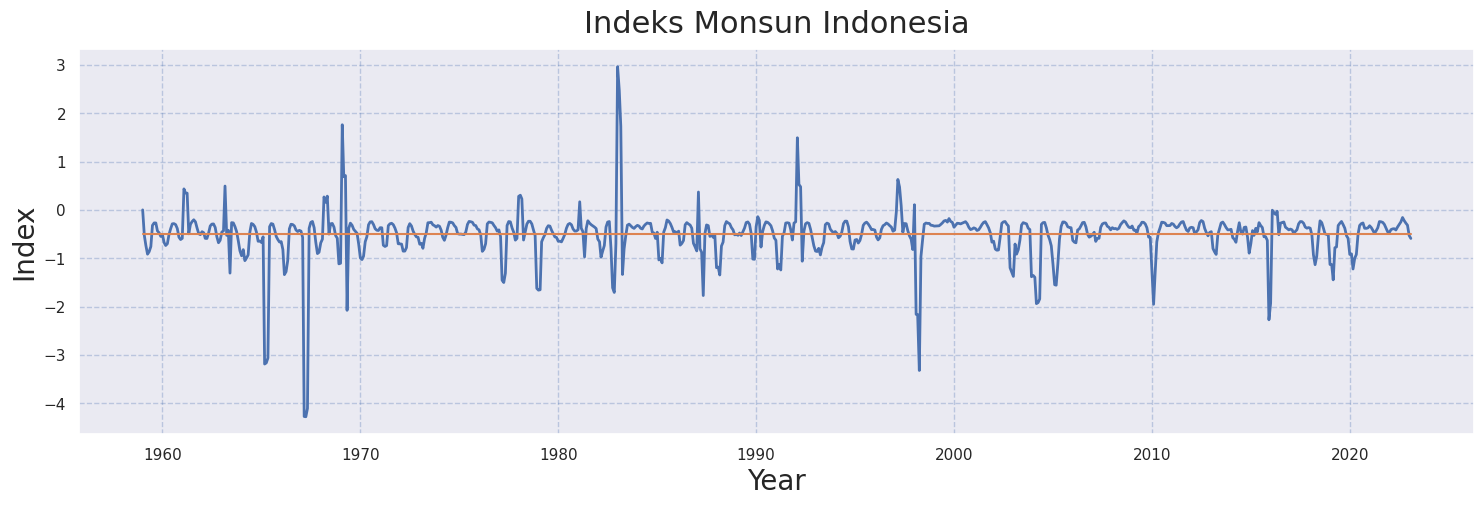

In [ ]:
import seaborn as sns
sns.set()
from numpy import matlib
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(df['date'],df['index'],linewidth=2)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Index', fontsize=20)
ax.grid(color='b',alpha=0.3,linestyle='dashed', linewidth=1)
plt.title('Indeks Monsun Indonesia', fontsize=22, loc='center',pad=12)
ax.plot(df['date'],np.squeeze((matlib.repmat((df['index'].mean()),1,df['date'].size))))

plt.show()

# Wavelet

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/')
from waveletFunctions import *

In [ ]:
import pandas as pd

# Load the time series data into a pandas dataframe
data = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindofix.xlsx')
sst = data["index"]
sst

0      0.000000
1     -0.529219
2     -0.733816
3     -0.916348
4     -0.864036
         ...   
765   -0.221121
766   -0.273773
767   -0.316953
768   -0.529015
769   -0.590853
Name: index, Length: 770, dtype: float64

In [ ]:
#Input time series data dan normalisasi data
#sst = np.loadtxt('Data/sst_nino3.dat')
variance = np.std(sst)
sst = (sst-np.mean(sst))/np.std(sst)
print(len(sst))

770


In [ ]:
#Buat array berisi waktu
n=len(sst)
dt=1
time = np.arange(len(sst))*dt/12 + 1959.0

a. Pengaturan Parameter Wavelet

In [ ]:
data = sst #Data
dj = 0.25 #Increment scale
pad = 0 #Time series diset nilai 0 (Default)
s0 = 2.*dt #Scale dimulai 6 bulanan (Default) | s0 merupakan scale terkecil dari Wavelet
j1 = 7./dj #Jumlah scale - 1 | Rentang  scale dari s0 sampai s0*2**(j1*dj) dengan jumlah scale sebanyak (j1+1)
mother = 'MORLET' #Shape Wavelet ada: Morlet, Difference of Gaussian (DOG), Paul)
lag1 = 0.72 #Lag-1 autocorrelation digunakan untuk level signifikansi

b. Transformasi Wavelet

In [ ]:
wave, period, scale, coi = wavelet(data, dt=dt, pad=pad, dj=dj, s0=s0, J1=j1, mother=mother) # fungsi wavelet
power = (np.abs(wave))**2 # hitung wavelet power spectrum
global_ws = (np.sum(power, axis=1))/n # time-average over all scale (global_ws)

c. Pengaturan Selang Kepercayaan

In [ ]:
signif = wave_signif(variance,dt=dt,scale=scale,sigtest=0,lag1=lag1,mother=mother)# fungsi signifikansi
sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis,:])# buat signif --> (J+1)x(N) array
sig95 = power/sig95 # ketika ratio power dan signif > 1, power signifikan

d. Spektrum Global Wavelet & Selang Kepercayaan

In [ ]:
dof = n-scale# the scale corrects for padding at edges
global_signif = wave_signif(variance,dt=dt,scale=scale,sigtest=1,lag1=lag1,dof=dof, mother=mother) # fungsi signifikansi untuk global_ws

e. *Scale-average* pada rentang periode 2 dan 8

In [ ]:
avg = np.logical_and(scale>=2,scale<8) # Logika untuk mengambil rentang skala 2 - 8
Cdelta= 0.776 # Cdelta untuk MORLET wavelet
scale_avg = scale[:, np.newaxis].dot(np.ones(n)[np.newaxis,:]) # buat scale --> (J+1)x(N) array
scale_avg = power/scale_avg # [Eqn(24)] di referensi
scale_avg = dj*dt/Cdelta*sum(scale_avg[avg, :]) # [Eqn(24)] di referensi
scale_signif = wave_signif(variance,dt=dt,scale=scale,sigtest=2,dof=[2,7],lag1=lag1,mother=mother) # fungsi signifikansi untuk scale average

f. Wavelet Power Spectrum

NameError: ignored

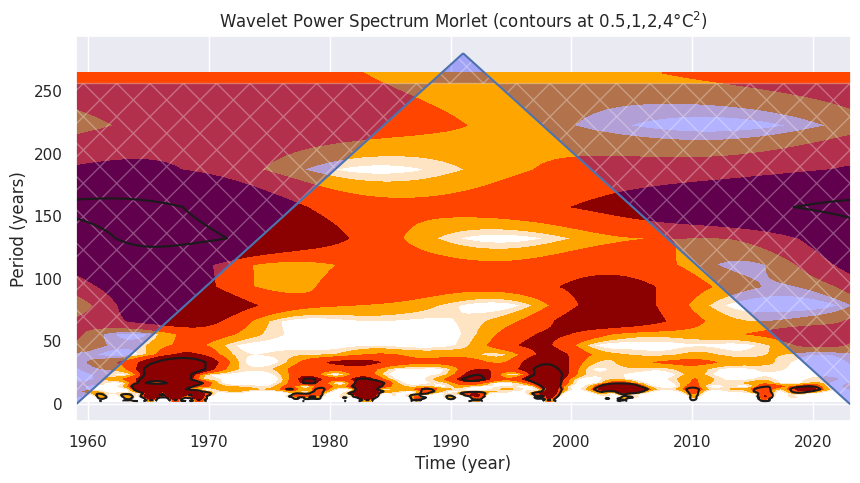

In [ ]:
plt.figure(figsize=(10,5))

#Plot contourf power, contour signifikansi, dan coi
levels = [0, 0.5, 1, 2, 4, 999]
cs = plt.contourf(time, period, power, levels=levels, colors=['white', 'bisque', 'orange', 'orangered', 'darkred'])
plt.contour(time, period, sig95,[-99,1], colors='k')
plt.plot(time,coi)
coi_area=np.concatenate([[np.max(scale)],coi,[np.max(scale)],[np.max(scale)]])
ts_area=np.concatenate([[time[0]], time, [time[-1]], [time[0]]])
plt.fill(ts_area, coi_area, 'blue', alpha=0.3, hatch='x')

plt.xlabel('Time (year)')
plt.ylabel('Period (years)')
plt.title('Wavelet Power Spectrum Morlet (contours at 0.5,1,2,4\u00B0C$^2$)')
plt.xlim(xlim[:])
plt.ylim([np.min(period), np.max(period)])
plt.yscale('log', base=2, subs=None)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

#Plot colorbar
plt.colorbar(cs)

TypeError: ignored

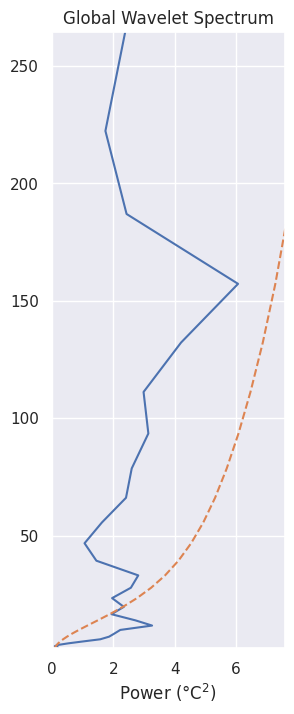

In [ ]:
plt.figure(figsize=(3,8))

#Plot global wavelet spectrum dan signifikansinya
plt.plot(global_ws, period)
plt.plot(global_signif, period, '--')

plt.xlabel('Power (\u00B0C$^2$)')
plt.title('Global Wavelet Spectrum')
plt.xlim([0, 1.25 * np.max(global_ws)])
plt.ylim([np.min(period), np.max(period)])
plt.yscale('log', basey=2, subsy=None)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(axis='y', style='plain')

NameError: ignored

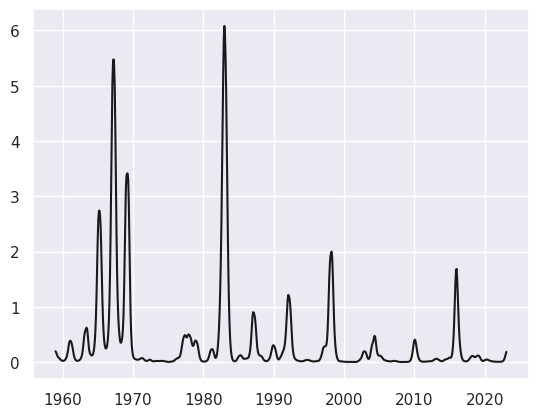

In [ ]:
#Plot time series 2-8 yr scale-average dan signifikansinya
plt.plot(time, scale_avg, 'k')
plt.plot(xlim,scale_signif+[0,0], '--')
plt.xlim(xlim[:])

plt.xlabel('Time (year)')
plt.ylabel('Avg variance (\u00B0C$^2$)')
plt.title('2-8 yr Scale-average Time Series')
plt.show()

# MSWEP Rainfall

### **Monthly Rainfall Plot**

In [ ]:
!pip install cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely --force

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as crt
import cartopy.crs as ccrs
import cartopy.feature as cftr
import seaborn as sns
#sns.set_theme(context='talk', font='serif', palette='colorblind')

In [ ]:
dsa = ds.sel(time=slice('1990-01','2019-12'))
dsa = dsa.groupby('time.month').mean()
#dsa = ds['time'].index.month.isin([11,12,1,2,3,4])
dsa

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=0).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Januari 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=1).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Februari 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=2).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Maret 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=3).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan April 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=4).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Mei 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=5).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Juni 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=6).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Juli 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=7).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Agustus 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=8).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan September 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=9).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Oktober 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=10).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan November 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

In [ ]:
  #Tren kecepatan angin di Indonesia (m/s per dekade)
  import matplotlib.pyplot as plt
  import matplotlib.ticker as mticker
  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)
  fig = plt.figure(figsize=(15,10))
  #mode_spasial = param_ccmp_ind.polyfit_coefficients.sel(degree=1)*(1/3.805175038E-16)*120
  level = np.linspace(0, 500, 6, endpoint=True)
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3,
                        projection=crt.crs.PlateCarree())
  PC_map = dsa.isel(month=11).plot.contourf(ax=ax,
                                      cmap='RdYlBu',
                                      levels=level,
                                      extend='both',
                                      transform=ccrs.PlateCarree(),
                                      add_colorbar=False)
  plt.colorbar(PC_map,
              shrink=0.8,
              pad=0.1,
              aspect=50,
               orientation='horizontal'
              ).set_label("mm")
  ax.set_title("Rata-rata Curah Hujan Bulan Desember 1990-2019", size=20, pad=15)
  ax.coastlines(lw=2, color='k', zorder=2)
  ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

  ax.coastlines()

  #ax.set_extent([90, 150, -15, 15])

  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='white',alpha=0.6)
  gl.top_labels = False
  gl.right_labels = False

  gl.ylocator = LatitudeLocator()
  gl.xformatter = LongitudeFormatter()
  gl.yformatter = LatitudeFormatter()


  gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
  gl.ylabel_style = {'color': 'k',  'size':18}

  #ax0.gridlines()

  plt.show()

### **3-Monthly Rainfall Anomaly**

In [ ]:
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']
ds

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the data
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']

# Calculate the monthly mean
monthly_mean = ds.groupby('time.month').mean()

# Calculate the seasonal mean
djf = monthly_mean.sel(month=[12, 1, 2]).mean(dim='month')
mam = monthly_mean.sel(month=[3, 4, 5]).mean(dim='month')
jja = monthly_mean.sel(month=[6, 7, 8]).mean(dim='month')
son = monthly_mean.sel(month=[9, 10, 11]).mean(dim='month')

# Calculate the anomalies
anomaly_djf = djf - monthly_mean.mean(dim='month')
anomaly_mam = mam - monthly_mean.mean(dim='month')
anomaly_jja = jja - monthly_mean.mean(dim='month')
anomaly_son = son - monthly_mean.mean(dim='month')

# Create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the anomalies for each season
im1 = axes[0, 0].pcolormesh(anomaly_djf.lon, anomaly_djf.lat, anomaly_djf, cmap='RdBu_r')
im2 = axes[0, 1].pcolormesh(anomaly_mam.lon, anomaly_mam.lat, anomaly_mam, cmap='RdBu_r')
im3 = axes[1, 0].pcolormesh(anomaly_jja.lon, anomaly_jja.lat, anomaly_jja, cmap='RdBu_r')
im4 = axes[1, 1].pcolormesh(anomaly_son.lon, anomaly_son.lat, anomaly_son, cmap='RdBu_r')

# Add colorbars to each subplot
cb1 = fig.colorbar(im1, ax=axes[0, 0], orientation='horizontal')
cb2 = fig.colorbar(im2, ax=axes[0, 1], orientation='horizontal')
cb3 = fig.colorbar(im3, ax=axes[1, 0], orientation='horizontal')
cb4 = fig.colorbar(im3, ax=axes[1, 1], orientation='horizontal')

# Set the titles and axis labels
axes[0, 0].set_title('DJF Anomaly')
axes[0, 1].set_title('MAM Anomaly')
axes[1, 0].set_title('JJA Anomaly')
axes[1, 1].set_title('SON Anomaly')
for ax in axes.flatten():
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Show the plot
plt.show()


Tambah basemap (cartopy)

In [ ]:
!pip install cartopy
!pip install shapely --no-binary shapely --force

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the data
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']
ds = ds.sel(time=slice('1990-01','2019-12'))

# Calculate the monthly mean
monthly_mean = ds.groupby('time.month').mean()

# Calculate the seasonal mean
djf = monthly_mean.sel(month=[12, 1, 2]).mean(dim='month')
mam = monthly_mean.sel(month=[3, 4, 5]).mean(dim='month')
jja = monthly_mean.sel(month=[6, 7, 8]).mean(dim='month')
son = monthly_mean.sel(month=[9, 10, 11]).mean(dim='month')

# Create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Calculate the anomalies
anomaly_djf = djf - monthly_mean.mean(dim='month')
anomaly_mam = mam - monthly_mean.mean(dim='month')
anomaly_jja = jja - monthly_mean.mean(dim='month')
anomaly_son = son - monthly_mean.mean(dim='month')

# Plot the anomalies for each season
im1 = axes[0, 0].pcolormesh(anomaly_djf.lon, anomaly_djf.lat, anomaly_djf, cmap='RdYlBu')
im2 = axes[0, 1].pcolormesh(anomaly_mam.lon, anomaly_mam.lat, anomaly_mam, cmap='RdYlBu')
im3 = axes[1, 0].pcolormesh(anomaly_jja.lon, anomaly_jja.lat, anomaly_jja, cmap='RdYlBu')
im4 = axes[1, 1].pcolormesh(anomaly_son.lon, anomaly_son.lat, anomaly_son, cmap='RdYlBu')

# Add colorbars to each subplot
cb1 = fig.colorbar(im1, ax=axes[0, 0], orientation='horizontal', shrink=0.6, pad=0.05)
cb2 = fig.colorbar(im2, ax=axes[0, 1], orientation='horizontal', shrink=0.6, pad=0.05)
cb3 = fig.colorbar(im3, ax=axes[1, 0], orientation='horizontal', shrink=0.6, pad=0.05)
cb4 = fig.colorbar(im4, ax=axes[1, 1], orientation='horizontal', shrink=0.6, pad=0.05)

# Set the titles and axis labels
axes[0, 0].set_title('DJF Anomaly')
axes[0, 1].set_title('MAM Anomaly')
axes[1, 0].set_title('JJA Anomaly')
axes[1, 1].set_title('SON Anomaly')
for ax in axes.flatten():
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES)

# Show the plot
plt.show()

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cftr
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)

# Open the netCDF dataset
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']
ds = ds.sel(time=slice('1990-01','2019-12'))

# Calculate the monthly mean
monthly_mean = ds.groupby('time.month').mean()

# Calculate the seasonal mean
djf = monthly_mean.sel(month=[12, 1, 2]).mean(dim='month')
#mam = monthly_mean.sel(month=[3, 4, 5]).mean(dim='month')
#jja = monthly_mean.sel(month=[6, 7, 8]).mean(dim='month')
#son = monthly_mean.sel(month=[9, 10, 11]).mean(dim='month')

# Define the levels for the contour plot
levels = np.linspace(0, 500, 6)

# Create the figure and subplot
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((2,2), (0,0),
                      projection=ccrs.PlateCarree())

# Define the color map and plot the contour map
cmap = plt.get_cmap('RdYlBu')
PC_map = djf.plot.contourf(ax=ax,
                           cmap=cmap,
                           levels=levels,
                           extend='both',
                           transform=ccrs.PlateCarree(),
                           add_colorbar=False)

# Add color bar and title to the subplot
plt.colorbar(PC_map,
             shrink=0.8,
             pad=0.1,
             aspect=50,
             orientation='horizontal'
             ).set_label("mm")
ax.set_title("Rainfall Anomaly DJF 1990-2019", size=20, pad=15)

# Add coastlines, land, and gridlines
ax.coastlines(lw=2, color='k', zorder=2)
ax.add_feature(cftr.LAND, facecolor='white', zorder=0)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='white',alpha=0.6)
gl.top_labels = False
gl.right_labels = False
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 12, 'color': 'k'}
gl.ylabel_style = {'color': 'k', 'size':12}

plt.show

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cftr
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)

# Open the netCDF dataset
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']
ds = ds.sel(time=slice('1990-01','2019-12'))

# Calculate the monthly mean
monthly_mean = ds.groupby('time.month').mean()

# Calculate the seasonal mean
#djf = monthly_mean.sel(month=[12, 1, 2]).mean(dim='month')
mam = monthly_mean.sel(month=[3, 4, 5]).mean(dim='month')
#jja = monthly_mean.sel(month=[6, 7, 8]).mean(dim='month')
#son = monthly_mean.sel(month=[9, 10, 11]).mean(dim='month')

# Define the levels for the contour plot
levels = np.linspace(0, 500, 6)

# Create the figure and subplot
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((2,2), (0,0),
                      projection=ccrs.PlateCarree())

# Define the color map and plot the contour map
cmap = plt.get_cmap('RdYlBu')
PC_map = mam.plot.contourf(ax=ax,
                           cmap=cmap,
                           levels=levels,
                           extend='both',
                           transform=ccrs.PlateCarree(),
                           add_colorbar=False)

# Add color bar and title to the subplot
plt.colorbar(PC_map,
             shrink=0.8,
             pad=0.1,
             aspect=50,
             orientation='horizontal'
             ).set_label("mm")
ax.set_title("Rainfall Anomaly MAM 1990-2019", size=20, pad=15)

# Add coastlines, land, and gridlines
ax.coastlines(lw=2, color='k', zorder=2)
ax.add_feature(cftr.LAND, facecolor='white', zorder=0)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='white',alpha=0.6)
gl.top_labels = False
gl.right_labels = False
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 12, 'color': 'k'}
gl.ylabel_style = {'color': 'k', 'size':12}

plt.show

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cftr
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)

# Open the netCDF dataset
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']
ds = ds.sel(time=slice('1990-01','2019-12'))

# Calculate the monthly mean
monthly_mean = ds.groupby('time.month').mean()

# Calculate the seasonal mean
#djf = monthly_mean.sel(month=[12, 1, 2]).mean(dim='month')
#mam = monthly_mean.sel(month=[3, 4, 5]).mean(dim='month')
jja = monthly_mean.sel(month=[6, 7, 8]).mean(dim='month')
#son = monthly_mean.sel(month=[9, 10, 11]).mean(dim='month')

# Define the levels for the contour plot
levels = np.linspace(0, 500, 6)

# Create the figure and subplot
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((2,2), (0,0),
                      projection=ccrs.PlateCarree())

# Define the color map and plot the contour map
cmap = plt.get_cmap('RdYlBu')
PC_map = jja.plot.contourf(ax=ax,
                           cmap=cmap,
                           levels=levels,
                           extend='both',
                           transform=ccrs.PlateCarree(),
                           add_colorbar=False)

# Add color bar and title to the subplot
plt.colorbar(PC_map,
             shrink=0.8,
             pad=0.1,
             aspect=50,
             orientation='horizontal'
             ).set_label("mm")
ax.set_title("Rainfall Anomaly JJA 1990-2019", size=20, pad=15)

# Add coastlines, land, and gridlines
ax.coastlines(lw=2, color='k', zorder=2)
ax.add_feature(cftr.LAND, facecolor='white', zorder=0)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='white',alpha=0.6)
gl.top_labels = False
gl.right_labels = False
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 12, 'color': 'k'}
gl.ylabel_style = {'color': 'k', 'size':12}

plt.show

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cftr
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)

# Open the netCDF dataset
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc')
ds = ds['precipitation']
ds = ds.sel(time=slice('1990-01','2019-12'))

# Calculate the monthly mean
monthly_mean = ds.groupby('time.month').mean()

# Calculate the seasonal mean
#djf = monthly_mean.sel(month=[12, 1, 2]).mean(dim='month')
#mam = monthly_mean.sel(month=[3, 4, 5]).mean(dim='month')
#jja = monthly_mean.sel(month=[6, 7, 8]).mean(dim='month')
son = monthly_mean.sel(month=[9, 10, 11]).mean(dim='month')

# Define the levels for the contour plot
levels = np.linspace(0, 500, 6)

# Create the figure and subplot
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((2,2), (0,0),
                      projection=ccrs.PlateCarree())

# Define the color map and plot the contour map
cmap = plt.get_cmap('RdYlBu')
PC_map = son.plot.contourf(ax=ax,
                           cmap=cmap,
                           levels=levels,
                           extend='both',
                           transform=ccrs.PlateCarree(),
                           add_colorbar=False)

# Add color bar and title to the subplot
plt.colorbar(PC_map,
             shrink=0.8,
             pad=0.1,
             aspect=50,
             orientation='horizontal'
             ).set_label("mm")
ax.set_title("Rainfall Anomaly SON 1990-2019", size=20, pad=15)

# Add coastlines, land, and gridlines
ax.coastlines(lw=2, color='k', zorder=2)
ax.add_feature(cftr.LAND, facecolor='white', zorder=0)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='white',alpha=0.6)
gl.top_labels = False
gl.right_labels = False
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 12, 'color': 'k'}
gl.ylabel_style = {'color': 'k', 'size':12}

plt.show

# **Hovmoller**

In [ ]:
!pip uninstall metpy
!pip install metpy

In [ ]:
!pip uninstall numpy
!pip install numpy

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import pandas as pd

Seluruh Indonesia

In [ ]:
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc'.format(param, start_time[:0]))
ds

In [ ]:
# Create time slice from dates
start_time = '1990-01'
end_time = '2019-12'

# Select NCEP/NCAR parameter and level
param = 'precipitation'
#level = 850

# Remote get dataset using OPeNDAP method via xarray
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc'.format(param, start_time[:0]))

# Create slice variables subset domain
time_slice = slice(start_time, end_time)
lat_slice = slice(15, -15)
lon_slice = slice(90, 150)

# Get data, selecting time, level, lat/lon slice
data = ds[param].sel(time=time_slice,
                     lat=lat_slice,
                     lon=lon_slice)

# Compute weights and take weighted average over latitude dimension
weights = np.cos(np.deg2rad(data.lat.values))
avg_data = (data * weights[None, :, None]).sum(dim='lat') / np.sum(weights)

# Get times and make array of datetime objects
vtimes = data.time.values.astype('datetime64[ms]').astype('O')

# Specify longitude values for chosen domain
lons = data.lon.values


# Start figure
fig = plt.figure(figsize=(10, 25))

# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 10], hspace=0.1)

# Tick labels
x_tick_labels = [u'100\N{DEGREE SIGN}E', u'110\N{DEGREE SIGN}E',
                 u'120\N{DEGREE SIGN}E', u'130\N{DEGREE SIGN}E',
                 u'140\N{DEGREE SIGN}E']

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax1.set_extent([90, 150, -15, 15], ccrs.PlateCarree(central_longitude=0))
ax1.set_yticks([-10,0, 10])
ax1.set_yticklabels([u'10\N{DEGREE SIGN}S', u'0\N{DEGREE SIGN}N', u'10\N{DEGREE SIGN}N'])
ax1.set_xticks([100,110,120,130,140])
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.5)

# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('MSWEP', loc='right')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = [0,50,100,150,200,250,300,350,400]
cf = ax2.contourf(lons, vtimes, mpcalc.smooth_n_point(
    avg_data, 9, 2), clevs, cmap='RdYlBu', extend='max')
#cs = ax2.contour(lons, vtimes, mpcalc.smooth_n_point(
#    avg_data, 9, 2), clevs, colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50)
cbar.set_label('mm')

# Make some ticks and tick labels
ax2.set_xticks([100,110,120,130,140])
ax2.set_xticklabels(x_tick_labels)
ax2.set_yticks(vtimes[0::12])
ax2.set_yticklabels(vtimes[0::12])

# Set some titles
plt.title('Precipitation', loc='left', fontsize=10)
plt.title('Time Range: {0:%Y%m%d %HZ} - {1:%Y%m%d %HZ}'.format(vtimes[0], vtimes[-1]),
          loc='right', fontsize=10)

plt.show()

Provinsi Kalimantan Timur

In [ ]:
# Create time slice from dates
start_time = '1990-01'
end_time = '2019-12'

# Select NCEP/NCAR parameter and level
param = 'precipitation'
#level = 850

# Remote get dataset using OPeNDAP method via xarray
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc'.format(param, start_time[:0]))

# Create slice variables subset domain
time_slice = slice(start_time, end_time)
lat_slice = slice(2.5, -2.5)
lon_slice = slice(112, 120)

# Get data, selecting time, level, lat/lon slice
data = ds[param].sel(time=time_slice,
                     lat=lat_slice,
                     lon=lon_slice)

# Compute weights and take weighted average over latitude dimension
weights = np.cos(np.deg2rad(data.lat.values))
avg_data = (data * weights[None, :, None]).sum(dim='lat') / np.sum(weights)

# Get times and make array of datetime objects
vtimes = data.time.values.astype('datetime64[ms]').astype('O')

# Specify longitude values for chosen domain
lons = data.lon.values


# Start figure
fig = plt.figure(figsize=(7, 25))

# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 10], hspace=0.1)

# Tick labels
x_tick_labels = [u'100\N{DEGREE SIGN}E', u'110\N{DEGREE SIGN}E',
                 u'120\N{DEGREE SIGN}E', u'130\N{DEGREE SIGN}E']

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax1.set_extent([113, 119, -2.5, 2.5], ccrs.PlateCarree(central_longitude=0))
ax1.set_yticks([-2,0,2])
ax1.set_yticklabels([u'2\N{DEGREE SIGN}S', u'0\N{DEGREE SIGN}N', u'2\N{DEGREE SIGN}N'])
ax1.set_xticks([113,115,117,119])
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.5)

# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('MSWEP', loc='right')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = [0,50,100,150,200,250,300,350,400]
cf = ax2.contourf(lons, vtimes, mpcalc.smooth_n_point(
    avg_data, 9, 2), clevs, cmap='RdYlBu', extend='max')
#cs = ax2.contour(lons, vtimes, mpcalc.smooth_n_point(
#    avg_data, 9, 2), clevs, colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50)
cbar.set_label('mm')

# Make some ticks and tick labels
ax2.set_xticks([113,115,117,119])
ax2.set_xticklabels(x_tick_labels)
ax2.set_yticks(vtimes[0::12])
ax2.set_yticklabels(vtimes[0::12])

# Set some titles
plt.title('Precipitation', loc='left', fontsize=10)
plt.title('Time Range: {0:%Y%m%d %HZ} - {1:%Y%m%d %HZ}'.format(vtimes[0], vtimes[-1]),
          loc='right', fontsize=10)

plt.show()

Wilayah Pantai Utara Jawa

In [ ]:
# Create time slice from dates
start_time = '1990-01'
end_time = '2019-12'

# Select NCEP/NCAR parameter and level
param = 'precipitation'
#level = 850

# Remote get dataset using OPeNDAP method via xarray
ds = xr.open_dataset('/content/drive/MyDrive/Project Monsun/Data/MSWEP_MON_INA_197902-202011.nc'.format(param, start_time[:0]))

# Create slice variables subset domain
time_slice = slice(start_time, end_time)
lat_slice = slice(-5.5, -7.5)
lon_slice = slice(105, 115)

# Get data, selecting time, level, lat/lon slice
data = ds[param].sel(time=time_slice,
                     lat=lat_slice,
                     lon=lon_slice)

# Compute weights and take weighted average over latitude dimension
weights = np.cos(np.deg2rad(data.lat.values))
avg_data = (data * weights[None, :, None]).sum(dim='lat') / np.sum(weights)

# Get times and make array of datetime objects
vtimes = data.time.values.astype('datetime64[ms]').astype('O')

# Specify longitude values for chosen domain
lons = data.lon.values


# Start figure
fig = plt.figure(figsize=(7, 25))

# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 10], hspace=0.1)

# Tick labels
x_tick_labels = [u'105\N{DEGREE SIGN}E', u'110\N{DEGREE SIGN}E', u'115\N{DEGREE SIGN}E']

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax1.set_extent([105, 115, -5.5, -7.5], ccrs.PlateCarree(central_longitude=0))
ax1.set_yticks([-7.5,-6.5,-5.5])
ax1.set_yticklabels([u'7.5\N{DEGREE SIGN}S', u'6.5\N{DEGREE SIGN}S', u'5.5\N{DEGREE SIGN}S'])
ax1.set_xticks([105,110,115])
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.5)

# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('MSWEP', loc='right')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = [0,50,100,150,200,250,300,350,400]
cf = ax2.contourf(lons, vtimes, mpcalc.smooth_n_point(
    avg_data, 9, 2), clevs, cmap='RdYlBu', extend='max')
#cs = ax2.contour(lons, vtimes, mpcalc.smooth_n_point(
#    avg_data, 9, 2), clevs, colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50)
cbar.set_label('mm')

# Make some ticks and tick labels
ax2.set_xticks([105,110,115])
ax2.set_xticklabels(x_tick_labels)
ax2.set_yticks(vtimes[0::12])
ax2.set_yticklabels(vtimes[0::12])

# Set some titles
plt.title('Precipitation', loc='left', fontsize=10)
plt.title('Time Range: {0:%Y%m%d %HZ} - {1:%Y%m%d %HZ}'.format(vtimes[0], vtimes[-1]),
          loc='right', fontsize=10)

plt.show()

# ANN-ARIMA

### **Step 1: Seasonal ARIMA**

In [ ]:
!pip install pmdarima

In [ ]:
# Import the required libraries
import pandas as pd
from pmdarima import auto_arima
import statsmodels.api as sm

# Load the time series data into a pandas dataframe
data = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindo.xlsx')
data = data["index"]

# Fit an auto-ARIMA model
#model = auto_arima(data, seasonal=True, suppress_warnings=True, error_action="ignore", trace=True)

# Print the summary of the best ARIMA model
#print(model.summary())

Fitting Model SARIMA

In [ ]:
#Model terbaik berdasarkan minitab
model = sm.tsa.statespace.SARIMAX(data, order=(0,0,3), seasonal_order=(0,1,5,12))
res = model.fit(disp=False)
print(res.summary())

In [ ]:
#Coba fitting model
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindo.xlsx')
data = data["index"]

# Create a time series from the data
ts = pd.Series(data, name='Monsoonal Index')

# Plot the original time series data
ts.plot()

# Decompose the time series into its components
#result = seasonal_decompose(ts, model='multiplicative')

# Plot the decomposition result
#result.plot()

# Define the order of the SARIMA model
order = (0, 0, 3)
seasonal_order = (0, 1, 5, 12)

# Fit the SARIMA model to the data
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Print the model summary
print(results.summary())

Print indeks model SARIMA

In [ ]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindo.xlsx')
data = data["index"]

# Fit SARIMA model
model = sm.tsa.SARIMAX(data, order=(0,0,3), seasonal_order=(0,1,4,12)).fit()

# Extract index from SARIMAX object
index = model.fittedvalues.index

# Print index to console
print(index)

In [ ]:
data

In [ ]:
import pandas as pd

# create a DataFrame with the data and index
df = pd.DataFrame({'value': data.values}, index=data.index)

# save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/TA/data.xlsx', index=True)

In [ ]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_excel('/content/drive/MyDrive/TA/data.xlsx')
#data = data["value"]

# Fit SARIMA model
model = sm.tsa.SARIMAX(data["value"], order=(0,0,3), seasonal_order=(0,1,4,12)).fit()

# Extract index from SARIMAX object
index = model.fittedvalues.index
index

In [ ]:
# Create a DataFrame with the index
df = pd.DataFrame({'value': model.fittedvalues}, index=index)
df

In [ ]:
# Check for missing or NaN values
print(df.isnull().sum())

In [ ]:
# Save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/TA/003-014-12.xlsx', index=False)

Auto ARIMA

In [ ]:
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# load data
data = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindo.xlsx')
data = data["index"]

# fit the seasonal ARIMA model using auto_arima
model = auto_arima(data, seasonal=True, suppress_warnings=True, error_action="ignore", stepwise=False, trace=False)

# print the ARIMA model parameters
print("ARIMA model parameters: (p,d,q) = ", model.order)
print("Seasonal ARIMA parameters: (P,D,Q,s) = ", model.seasonal_order)

# plot the residuals
residuals = model.resid()
plt.plot(residuals)
plt.title("Residuals Plot")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

Validasi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from statsmodels.tsa.stattools import adfuller

# Load the data
data = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindo2.xlsx')

# Fit the ARIMA model
data=data["index"]
model = sm.tsa.statespace.SARIMAX(data, order=(0,0,3), seasonal_order=(0,1,4,12))
model_fit = model.fit()


# Make predictions with ARIMA model
predictions = model_fit.predict(start=len(data), end=len(data)+11, typ='levels')
predictions

Forecast SARIMA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from statsmodels.tsa.stattools import adfuller

# Load the data
data = pd.read_excel('/content/drive/MyDrive/TA/indeksmonsunindo.xlsx')

# Fit the ARIMA model
data=data["index"]
model = sm.tsa.statespace.SARIMAX(data, order=(0,0,3), seasonal_order=(0,1,5,12))
model_fit = model.fit()


# Make predictions with ARIMA model
predictions = model_fit.predict(start=len(data), end=len(data)+12, typ='levels')
predictions

### **Step 2: Model Seasonal ARIMA -> ANN 4 configuration**

This script demonstrates how you can use ARIMA to make initial predictions, combine these predictions with the original data, and then process this combined data in four different configurations of an ANN. Note that the exact choice of model hyperparameters, such as the autoregressive window size and the number of epochs in the training process, will depend on the specifics of your data and problem.

After a neural network has been created, it must be configured. The configuration step consists of examining input and target data, setting the network's input and output sizes to match the data, and choosing settings for processing inputs and outputs that will enable best network performance.

In the context of an Artificial Neural Network (ANN), the configuration refers to the specifications or hyperparameters that define the structure and behavior of the network. These configurations can include the number of layers, the number of neurons in each layer, the activation function used, the type of learning algorithm, etc.

Regarding the "window in [3, 6, 9, 12]," it could refer to the size of the sliding window used for processing the input time series data. In this case, the window size is being iterated through four different values: 3, 6, 9, and 12. A sliding window is a subset of consecutive observations from a time series that is moved along the time axis in equal increments. The size of the window determines the number of time steps used as input to predict the next time step. By iterating through different window sizes, the performance of the ANN model can be evaluated for different levels of input complexity. The optimal window size is typically chosen based on the performance metric, such as accuracy or mean squared error.

The complexity of the ANN model is not necessarily related to the size of the window. The window size refers to the number of time steps used as input for the model. A smaller window size (such as 3) uses less data as input and may result in a simpler model, but it may also lead to loss of information and accuracy. A larger window size (such as 12) uses more data as input and may result in a more complex model, but it may also lead to improved accuracy and ability to capture longer term patterns. The choice of window size depends on the nature of the data and the specific requirements of the problem being solved.

In [ ]:
import pandas as pd

# Load the data
data = pd.read_excel('/content/drive/MyDrive/TA/indekssarima.xlsx')
data = data["index"]
data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Scale the data for processing in ANN
train = data.values
train = train.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(train)

# Split the data into training and test sets
train_data = data_scaled[:-13]
test_data = data_scaled[-13:]

train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

# Create four configurations of the ANN model
ann_models = []
for window in [3, 6, 9, 12]:
    # Initialize the ANN model
    model = Sequential()
    model.add(Dense(12, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the ANN model
    history = model.fit(train_data[:, -window:], train_data[:, 0], epochs=100, verbose=0)

    # Make predictions with the ANN model
    predictions_ann = model.predict(test_data[:, -window:])

    # Invert the predictions
    predictions_ann = scaler.inverse_transform(predictions_ann)

    # Store the model and its predictions
    ann_models.append((model, predictions_ann))

# Combine the predictions from the four configurations of the ANN model
predictions_combined = np.mean([predictions_ann for _, predictions_ann in ann_models], axis=0)
predictions_combined

In [ ]:
import pandas as pd

# Convert predictions_combined ndarray to DataFrame
predictions_df = pd.DataFrame(predictions_combined)

# Save DataFrame to Excel file
predictions_df.to_excel('/content/drive/MyDrive/TA/ann_arima.xlsx', index=False)

Coba print model ANN

In [ ]:
import pandas as pd

# Convert predictions_combined ndarray to DataFrame
annmodel_df = pd.DataFrame(model_combined)

# Save DataFrame to Excel file
annmodel_df.to_excel('/content/drive/MyDrive/TA/ann_model.xlsx', index=False)

Dari sini, dibandingkan hasilnya mana yang hasil prediksinya lebih sesuai dengan data di 2019

Didapatkan bahwa hasil hybrid ANN-ARIMA memiliki hasil prediksi yang lebih akurat
